In [1]:
## Exploratory Data Project

## Import All Libraries

## Data Visualization
Visualizing the data helps us uncover trends, patterns, and outliers. Here, we use Matplotlib and Seaborn for plotting.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

%matplotlib inline

## Reac csv files

In [4]:
## regular csv read wont work with this data set

alias_values = set(aliases.values())


## Data Loading
In this section, we load the crime dataset using Pandas and display the first few rows to get an overview.

In [7]:
for encoding in set (aliases.values()):
    try:
        df = pd.read_csv('crime.csv',nrows=10,encoding=encoding) ## Read in 10 lines
        print('succesful',encoding)
    except:
        pass

succesful iso8859_13
succesful cp273
succesful iso8859_7
succesful mbcs
succesful iso8859_8
succesful mac_turkish
succesful cp862
succesful mac_iceland
succesful cp855
succesful cp857
succesful cp869
succesful iso8859_15
succesful cp1026
succesful iso8859_2
succesful cp861
succesful cp437
succesful kz1048
succesful cp932
succesful iso8859_3
succesful cp775
succesful iso8859_14
succesful cp037
succesful iso8859_5
succesful utf_16_be
succesful cp1125
succesful cp850
succesful cp1251
succesful cp500
succesful iso8859_4
succesful mac_greek
succesful cp1250
succesful gbk
succesful cp1258
succesful iso8859_9
succesful mac_latin2
succesful cp949
succesful cp1256
succesful mac_roman
succesful iso8859_10
succesful koi8_r
succesful mac_cyrillic
succesful cp864
succesful cp1254
succesful cp860
succesful cp1255
succesful cp865
succesful cp863
succesful cp866
succesful cp852
succesful gb18030
succesful iso8859_6
succesful cp1257
succesful big5hkscs
succesful iso8859_11
succesful utf_16_le
succesful

## Data Loading
In this section, we load the crime dataset using Pandas and display the first few rows to get an overview.

In [8]:
## read CSv file using the encoding as an index
crime = pd.read_csv('crime.csv',encoding = 'iso8859_7')

In [9]:
## df head
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [12]:
## 17 columns, over 310k rows
crime.shape

(319073, 17)

In [14]:
## 23 duplicate values
crime.duplicated().sum()

23

In [16]:
## dropping duplicates and setting inplace as True to keep change
crime.drop_duplicates(inplace=True)

In [17]:
crime.shape

(319050, 17)

## Explore Dataset

In [18]:
crime.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [19]:
crime.tail(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


## Initial Data Exploration
Here, we check the structure of our dataset, including column names, data types, and missing values. We also generate summary statistics to understand distributions.

In [20]:
crime.info() ## Summary Info
## some null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [22]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

## Initial Data Exploration
Here, we check the structure of our dataset, including column names, data types, and missing values. We also generate summary statistics to understand distributions.

In [23]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [25]:
crime['OCCURRED_ON_DATE'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [26]:
crime['OCCURRED_ON_DATE'].dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [27]:
crime['OCCURRED_ON_DATE'].dt.week

C:\Users\Thomas Breton\AppData\Local\Temp\ipykernel_17932\2472976291.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  crime['OCCURRED_ON_DATE'].dt.week


0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

## Initial Data Exploration
Here, we check the structure of our dataset, including column names, data types, and missing values. We also generate summary statistics to understand distributions.

In [28]:
crime.describe() ## summary info

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [30]:
crime.describe(include=object) ## Get information on non numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [32]:
## Columns with null values
crime.columns[crime.isnull().any()].tolist()

['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long']

In [35]:
## Columns with no missing values
crime.columns[np.sum(crime.isnull())== 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [47]:
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + ' has ' + str(unique_count) + ' unique values')

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


## Answering Some Questions

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [53]:
## Which are the most common crimes?
crime.head()
crime['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [55]:
top_off_vals = crime['OFFENSE_CODE_GROUP'].value_counts()[:10]
top_off_vals

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [71]:
display(top_off_vals/crime.shape[0]) ## Displaying as a percentage

Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: OFFENSE_CODE_GROUP, dtype: float64

## Data Visualization
Visualizing the data helps us uncover trends, patterns, and outliers. Here, we use Matplotlib and Seaborn for plotting.

Text(0.5, 1.0, 'Top 10 Offense Groups as percentage')

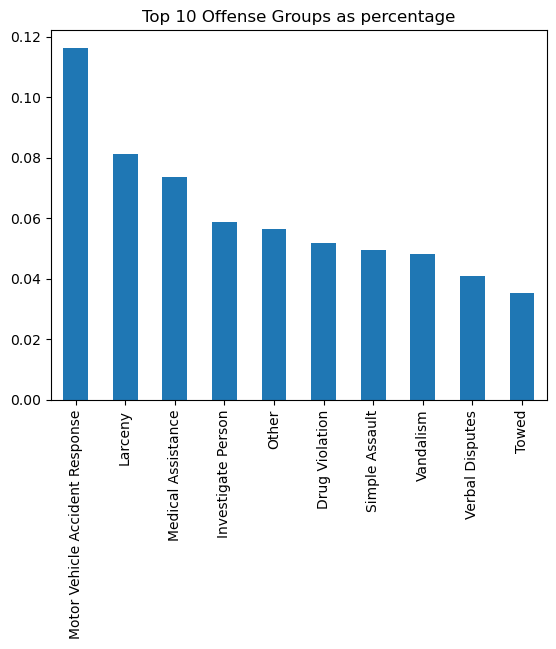

In [79]:
(top_off_vals/crime.shape[0]).plot(kind ='bar');
plt.title('Top 10 Offense Groups as percentage')

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [81]:
## Least common crimes
crime['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=True)[:10]

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [82]:
## Most common offense descriptions
crime['OFFENSE_DESCRIPTION'].value_counts()[:10]

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [83]:
top_off_descr = crime['OFFENSE_CODE_GROUP'].value_counts()[:10]

## Data Visualization
Visualizing the data helps us uncover trends, patterns, and outliers. Here, we use Matplotlib and Seaborn for plotting.

Text(0.5, 1.0, 'Top Offense Coud Groups as Percentage')

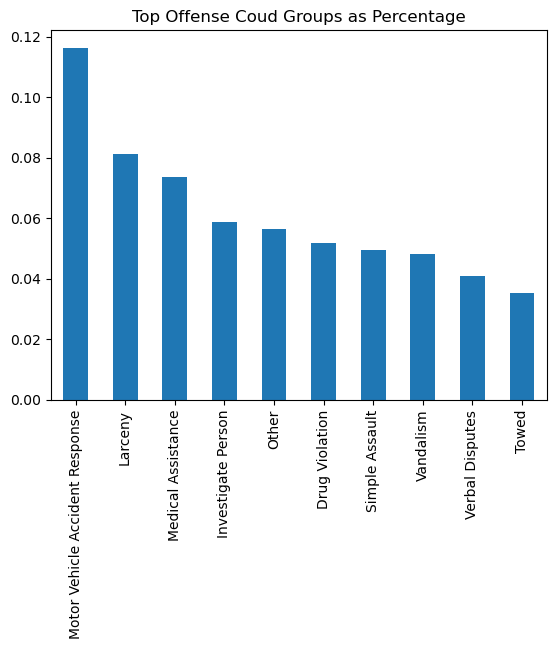

In [87]:
(top_off_descr/crime.shape[0]).plot(kind='bar')
plt.title('Top Offense Coud Groups as Percentage')

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [88]:
## Years when crimes were commited
crime['YEAR'].value_counts()

2017    100884
2016     99110
2018     65685
2015     53371
Name: YEAR, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

Text(0.5, 1.0, 'Number of Incidents')

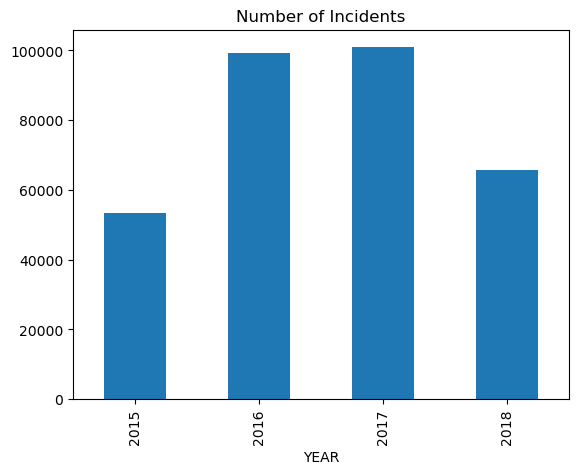

In [94]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('Number of Incidents')

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

<AxesSubplot:xlabel='YEAR', ylabel='INCIDENT_NUMBER'>

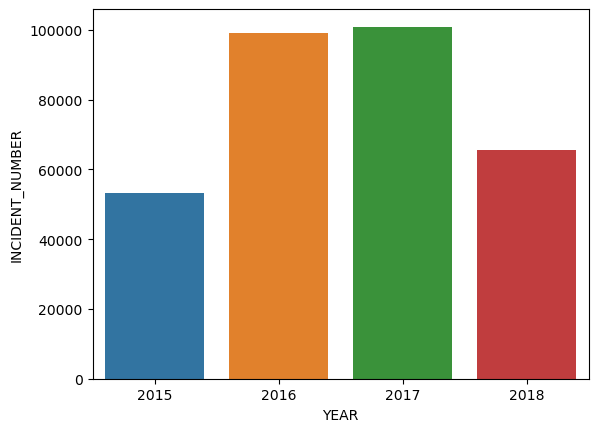

In [100]:
plot_data = crime.groupby('YEAR').count().reset_index()

# Create bar plot using Seaborn
sns.barplot(data=plot_data, x='YEAR', y='INCIDENT_NUMBER')

## Data Visualization
Visualizing the data helps us uncover trends, patterns, and outliers. Here, we use Matplotlib and Seaborn for plotting.

In [101]:
plot_data

,YEAR,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,2015,53371,53371,53371,53371,53243,53371,185,53371,53371,53371,53371,53370,52089,51190,51190,53371
1,2016,99110,99110,99110,99110,98593,99110,279,99110,99110,99110,99110,99076,93395,92339,92339,99110
2,2017,100884,100884,100884,100884,100308,100884,370,100884,100884,100884,100884,100845,98153,94059,94059,100884
3,2018,65685,65685,65685,65685,65141,65685,185,65685,65685,65685,65685,65669,64542,61464,61464,65685


## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [105]:
crime.groupby('YEAR')['INCIDENT_NUMBER'].count()

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [109]:
## What are the days where more crimes are committed?
crime.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().sort_values(ascending=False)

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

<AxesSubplot:xlabel='DAY_OF_WEEK'>

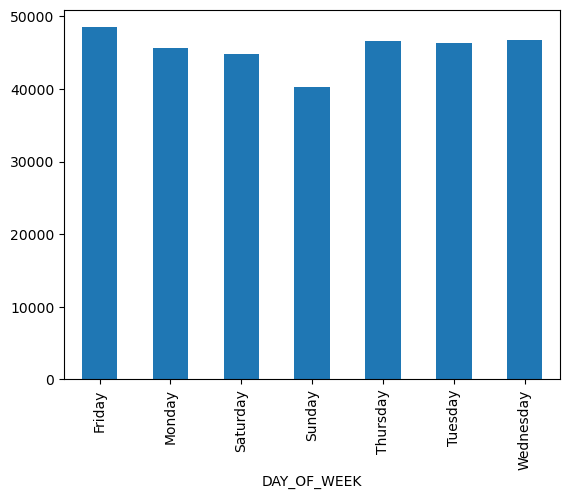

In [107]:
## Graphical answer
crime.groupby('DAY_OF_WEEK')['INCIDENT_NUMBER'].count().plot(kind='bar')

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

<AxesSubplot:xlabel='HOUR'>

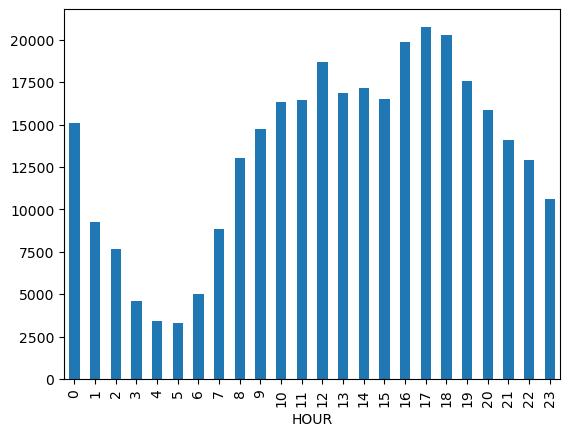

In [110]:
## Same bu for hours
crime.groupby('HOUR')['INCIDENT_NUMBER'].count().plot(kind='bar')

In [111]:
## what days and hours are most crime committed

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [121]:
week_hour = crime.groupby(['HOUR','DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().unstack()

In [125]:
week_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [126]:
week_hour

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


<AxesSubplot:ylabel='HOUR'>

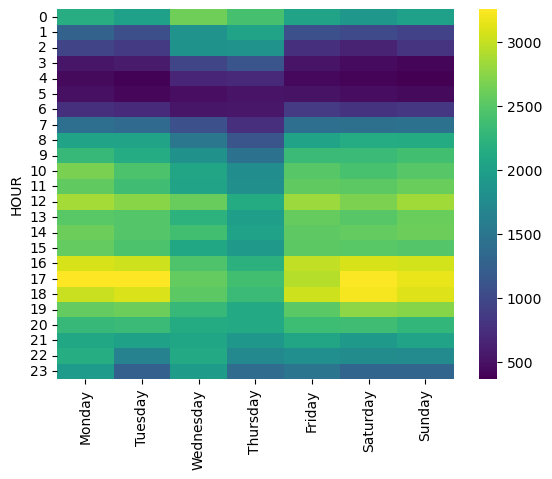

In [127]:
## heatmap answering question
sns.heatmap(data=week_hour,cmap='viridis')

In [128]:
## In which months were the number of crimes below average?
## In which months on average did the most crimes occur?

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [132]:
crime.groupby(['YEAR','MONTH'])['INCIDENT_NUMBER'].count()

YEAR  MONTH
2015  6        4188
      7        8322
      8        8340
      9        8411
      10       8305
      11       7818
      12       7987
2016  1        7835
      2        7307
      3        8199
      4        8101
      5        8578
      6        8558
      7        8618
      8        8938
      9        8521
      10       8582
      11       7922
      12       7951
2017  1        7991
      2        7408
      3        8179
      4        8069
      5        8715
      6        8985
      7        9075
      8        9206
      9        8940
      10       8846
      11       7935
      12       7535
2018  1        7782
      2        6937
      3        7768
      4        7916
      5        8906
      6        8834
      7        8538
      8        8337
      9         667
Name: INCIDENT_NUMBER, dtype: int64

In [133]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [137]:
avg_crime = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()

In [138]:
avg_crime

7976.25

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [139]:
year_month = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].unstack()

In [140]:
year_month

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,4188.0,8322.0,8340.0,8411.0,8305.0,7818.0,7987.0
2016,7835.0,7307.0,8199.0,8101.0,8578.0,8558.0,8618.0,8938.0,8521.0,8582.0,7922.0,7951.0
2017,7991.0,7408.0,8179.0,8069.0,8715.0,8985.0,9075.0,9206.0,8940.0,8846.0,7935.0,7535.0
2018,7782.0,6937.0,7768.0,7916.0,8906.0,8834.0,8538.0,8337.0,667.0,NaN,NaN,NaN


In [141]:
def highlight_above_avg(val):
    avg = avg_crime ## average value
    return'background-color: yellow' if val > avg else ''

In [143]:
styled_df = year_month.style.applymap(highlight_above_avg)

In [144]:
styled_df ## above crime

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,nan,nan,nan,nan,nan,4188.000000,8322.000000,8340.000000,8411.000000,8305.000000,7818.000000,7987.000000
2016,7835.000000,7307.000000,8199.000000,8101.000000,8578.000000,8558.000000,8618.000000,8938.000000,8521.000000,8582.000000,7922.000000,7951.000000
2017,7991.000000,7408.000000,8179.000000,8069.000000,8715.000000,8985.000000,9075.000000,9206.000000,8940.000000,8846.000000,7935.000000,7535.000000
2018,7782.000000,6937.000000,7768.000000,7916.000000,8906.000000,8834.000000,8538.000000,8337.000000,667.000000,nan,nan,nan


In [153]:
def highlight_below_avg(val):
    avg = avg_crime ## average value
    return'background-color: blue' if val < avg else ''

In [146]:
styled_df_below = year_month.style.applymap(highlight_below_avg)

In [148]:
styled_df_below ## Below average

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,nan,nan,nan,nan,nan,4188.000000,8322.000000,8340.000000,8411.000000,8305.000000,7818.000000,7987.000000
2016,7835.000000,7307.000000,8199.000000,8101.000000,8578.000000,8558.000000,8618.000000,8938.000000,8521.000000,8582.000000,7922.000000,7951.000000
2017,7991.000000,7408.000000,8179.000000,8069.000000,8715.000000,8985.000000,9075.000000,9206.000000,8940.000000,8846.000000,7935.000000,7535.000000
2018,7782.000000,6937.000000,7768.000000,7916.000000,8906.000000,8834.000000,8538.000000,8337.000000,667.000000,nan,nan,nan


## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [149]:
max_val = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].max()

9206

In [160]:
def highlight_max(row):
    max_val = row.max()
    return['background-color: green' if v==max_val else '' for v in row]

In [161]:
styled_df_max = year_month.style.apply(highlight_max, axis=1)

In [162]:
styled_df_max

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,nan,nan,nan,nan,nan,4188.000000,8322.000000,8340.000000,8411.000000,8305.000000,7818.000000,7987.000000
2016,7835.000000,7307.000000,8199.000000,8101.000000,8578.000000,8558.000000,8618.000000,8938.000000,8521.000000,8582.000000,7922.000000,7951.000000
2017,7991.000000,7408.000000,8179.000000,8069.000000,8715.000000,8985.000000,9075.000000,9206.000000,8940.000000,8846.000000,7935.000000,7535.000000
2018,7782.000000,6937.000000,7768.000000,7916.000000,8906.000000,8834.000000,8538.000000,8337.000000,667.000000,nan,nan,nan


In [164]:
crime.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [168]:
## In Which distrcits were the most crimes committed

crime.groupby('DISTRICT')['YEAR'].count().sort_values(ascending = False)

DISTRICT
B2     49940
C11    42528
D4     41914
A1     35710
B3     35441
C6     23457
D14    20127
E13    17534
E18    17347
A7     13544
E5     13238
A15     6505
Name: YEAR, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [174]:
## In Which districts were the most crimes committed on a yearly basis

crime.groupby('YEAR')['DISTRICT'].count().sort_values(ascending = False)

YEAR
2017    100308
2016     98593
2018     65141
2015     53243
Name: DISTRICT, dtype: int64

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [177]:
inc_mean = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].mean()
inc_mean

6610.104166666667

## Grouping and Aggregation
We perform group-by operations to analyze crime patterns over time, by category, or location.

In [179]:
inc_mean_graph = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

<AxesSubplot:xlabel='YEAR', ylabel='DISTRICT'>

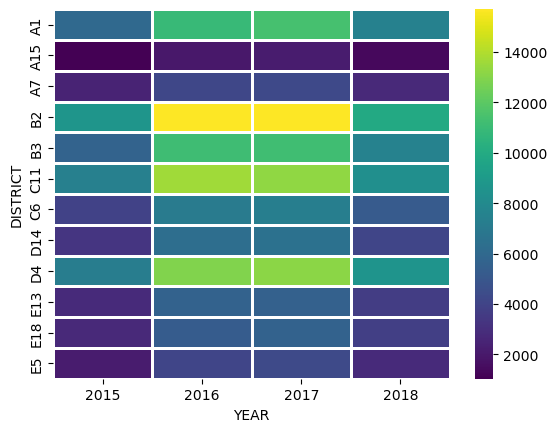

In [181]:
sns.heatmap(inc_mean_graph,cmap='viridis',linewidths=1,linecolor='white')